<a href="https://colab.research.google.com/github/nooralhudaa/Cirrhosis-Prediction-Dataset/blob/main/Cirrhosis_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Context**

Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism. The following data contains the information collected from the Mayo Clinic trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984. A description of the clinical background for the trial and the covariates recorded here is in Chapter 0, especially Section 0.2 of Fleming and Harrington, Counting
Processes and Survival Analysis, Wiley, 1991. A more extended discussion can be found in Dickson, et al., Hepatology 10:1-7 (1989) and in Markus, et al., N Eng J of Med 320:1709-13 (1989).

A total of 424 PBC patients, referred to Mayo Clinic during that ten-year interval, met eligibility criteria for the randomized placebo-controlled trial of the drug D-penicillamine. The first 312 cases in the dataset participated in the randomized trial and contain largely complete data. The additional 112 cases did not participate in the clinical trial but consented to have basic measurements recorded and to be followed for survival. Six of those cases were lost to follow-up shortly after diagnosis, so the data here are on an additional 106 cases as well as the 312 randomized participants.


**Attribute Information**


1) ID: unique identifier


2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986


3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)


4) Drug: type of drug D-penicillamine or placebo


5) Age: age in [days]


6) Sex: M (male) or F (female)


7) Ascites: presence of ascites N (No) or Y (Yes)


8) Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)


9) Spiders: presence of spiders N (No) or Y (Yes)


10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)


11) Bilirubin: serum bilirubin in [mg/dl]


12) Cholesterol: serum cholesterol in [mg/dl]


13) Albumin: albumin in [gm/dl]


14) Copper: urine copper in [ug/day]


15) Alk_Phos: alkaline phosphatase in [U/liter]


16) SGOT: SGOT in [U/ml]


17) Triglycerides: triglicerides in [mg/dl]


18) Platelets: platelets per cubic [ml/1000]


19) Prothrombin: prothrombin time in seconds [s]


20) Stage: histologic stage of disease (1, 2, 3, or 4)

# Project 4 - Part 1 (Core):

# Explore/clean the data


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df= pd.read_csv('/content/cirrhosis.csv')

In [ ]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
ID,0
N_Days,0
Status,0
Drug,106
Age,0
Sex,0
Ascites,106
Hepatomegaly,106
Spiders,106
Edema,0


In [ ]:
#Check for and address any inconsistent values in categorical columns.
# Identify string columns
string_cols = df.select_dtypes("object").columns
string_cols
# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for Status
Status
C     232
D     161
CL     25
Name: count, dtype: int64


Value Counts for Drug
Drug
D-penicillamine    158
Placebo            154
Name: count, dtype: int64


Value Counts for Sex
Sex
F    374
M     44
Name: count, dtype: int64


Value Counts for Ascites
Ascites
N    288
Y     24
Name: count, dtype: int64


Value Counts for Hepatomegaly
Hepatomegaly
Y    160
N    152
Name: count, dtype: int64


Value Counts for Spiders
Spiders
N    222
Y     90
Name: count, dtype: int64


Value Counts for Edema
Edema
N    354
S     44
Y     20
Name: count, dtype: int64




In [ ]:
## Check for and address any impossible values in numeric columns
# Identify numerical columns
numerical_cols = df.select_dtypes("number").columns
numerical_cols
# Obtain the value counts for all string columns
for col in numerical_cols:
  print(f"Value Counts for {col}")
  print(df[col].describe())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for ID
count    418.000000
mean     209.500000
std      120.810458
min        1.000000
25%      105.250000
50%      209.500000
75%      313.750000
max      418.000000
Name: ID, dtype: float64


Value Counts for N_Days
count     418.000000
mean     1917.782297
std      1104.672992
min        41.000000
25%      1092.750000
50%      1730.000000
75%      2613.500000
max      4795.000000
Name: N_Days, dtype: float64


Value Counts for Age
count      418.000000
mean     18533.351675
std       3815.845055
min       9598.000000
25%      15644.500000
50%      18628.000000
75%      21272.500000
max      28650.000000
Name: Age, dtype: float64


Value Counts for Bilirubin
count    418.000000
mean       3.220813
std        4.407506
min        0.300000
25%        0.800000
50%        1.400000
75%        3.400000
max       28.000000
Name: Bilirubin, dtype: float64


Value Counts for Cholesterol
count     284.000000
mean      369.510563
std       231.944545
min       120.000000
25%       2

In [ ]:
#Platelets: the maximum of 721 are outside typical ranges (150,000-450,000 per microliter).
df.loc[df['Platelets'] == 721]


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
333,334,466,D,NaN,20454,F,NaN,NaN,NaN,N,7.1,NaN,3.51,NaN,NaN,NaN,NaN,721.0,11.8,NaN


In [ ]:
#Cholesterol:The maximum value of 1775 is extremely high and could be an error. Normal cholesterol levels usually range from 125 to 200 mg/dL.
df.loc[df['Cholesterol'] == 1775]

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
129,130,1413,D,Placebo,16154,F,N,Y,Y,N,17.4,1775.0,3.43,205.0,2065.0,165.85,97.0,418.0,11.5,3.0


In [ ]:
#Alk_Phos (Alkaline Phosphatase):The maximum value of 13862.4 is extremely high, suggesting a possible error. Normal values are typically 44 to 147 IU/L.
df.loc[df['Alk_Phos'] == 13862.4]

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
55,56,1847,D,Placebo,12279,F,N,Y,Y,N,1.1,498.0,3.8,88.0,13862.4,95.46,319.0,365.0,10.6,2.0


In [ ]:
#Copper:The maximum value of 588 is quite high, as typical serum copper levels are around 70-140 µg/dL.
df.loc[df['Copper'] == 588]

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
17,18,131,D,D-penicillamine,19698,F,N,Y,Y,Y,11.4,178.0,2.8,588.0,961.0,280.55,200.0,283.0,12.4,4.0


In [ ]:
df['Stage'].fillna(df['Stage'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

,0
ID,0
N_Days,0
Status,0
Drug,106
Age,0
Sex,0
Ascites,106
Hepatomegaly,106
Spiders,106
Edema,0


In [ ]:
df.drop('ID', axis=1, inplace=True)

In [ ]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
y = df['Stage']
x= df.drop(['Stage'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [ ]:
from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer



In [ ]:
# For this task, handle missing values by using an appropriate imputation strategy (instead of dropping rows).
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = x_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# Instantiate the new imputer
impute_na = SimpleImputer(strategy='median')
#Scale the data if your model requires it.
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_na,scaler)
num_pipe
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

Numeric Columns: Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'],
      dtype='object')


('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
        'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'],
       dtype='object'))

In [ ]:
#onehotencoder
# catogrical Preprocessing Pipeline
# Save list of column names
cat_cols = x_train.select_dtypes("object").columns
print("catogrical Columns:", cat_cols)
# instantiate preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value='NaN')
ohe= OneHotEncoder(sparse=False,handle_unknown='ignore')
# Make a cat preprocessing pipeline
cat_pipe = make_pipeline(impute_na,ohe)
# Making a cat tuple for ColumnTransformer
cat_tuple = ('catogrical', cat_pipe, cat_cols)


catogrical Columns: Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')


In [ ]:
# Create the Column Transformer
preprocessor = ColumnTransformer([cat_tuple,num_tuple],
                                 verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('catogrical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NaN',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')),
                                ('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
preprocessor.fit(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('catogrical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NaN',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')),
                                ('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
# Transform the training data
x_train_processed = preprocessor.transform(x_train)
# Transform the testing data
x_test_processed = preprocessor.transform(x_test)
# View the processed training data
x_train_processed.head()

,Status_C,Status_CL,Status_D,Drug_D-penicillamine,Drug_NaN,Drug_Placebo,Sex_F,Sex_M,Ascites_N,Ascites_NaN,...,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
132,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.094673,-0.358084,-0.126143,1.055965,-1.084819,-0.670351,0.286023,-0.402506,-0.967827,-0.627892
60,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,-0.648012,-0.570223,-0.690815,1.032169,-0.868242,-0.655754,-1.187780,1.194278,-0.494040,2.368624
198,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,-0.943761,-0.216657,0.173378,-0.181392,-0.521720,-0.172817,1.491861,1.301926,0.711025,-0.524564
332,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.476958,-0.051660,-0.234167,0.984579,-0.247391,-0.297505,-0.149419,-0.187210,-0.046003,-0.111251
63,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.119106,-0.216657,0.080085,-0.014825,-0.521720,-0.407595,0.754960,1.194278,-0.833931,0.302062


In [ ]:
y_train.value_counts()

,count
Stage,
3.0,117
4.0,108
2.0,71
1.0,17


In [ ]:
x_train_processed.isna().sum()

,0
Status_C,0
Status_CL,0
Status_D,0
Drug_D-penicillamine,0
Drug_NaN,0
Drug_Placebo,0
Sex_F,0
Sex_M,0
Ascites_N,0
Ascites_NaN,0


#Exploratory Visualizations
Creating exploratory visualizations to understand your data and search for trends.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Concatenate x_train_processed and y_train into a single DataFrame
df_proc = pd.concat([x_train_processed, y_train], axis=1)

# Calculate the correlation matrix
corr = df_proc.corr()

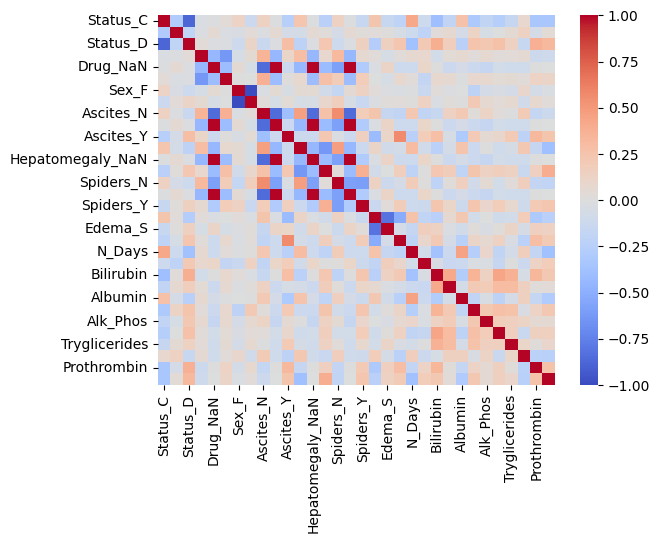

In [ ]:
# Calculating the correlation matrix and plotting
corr = df_proc.corr()
sns.heatmap(corr, cmap='coolwarm');



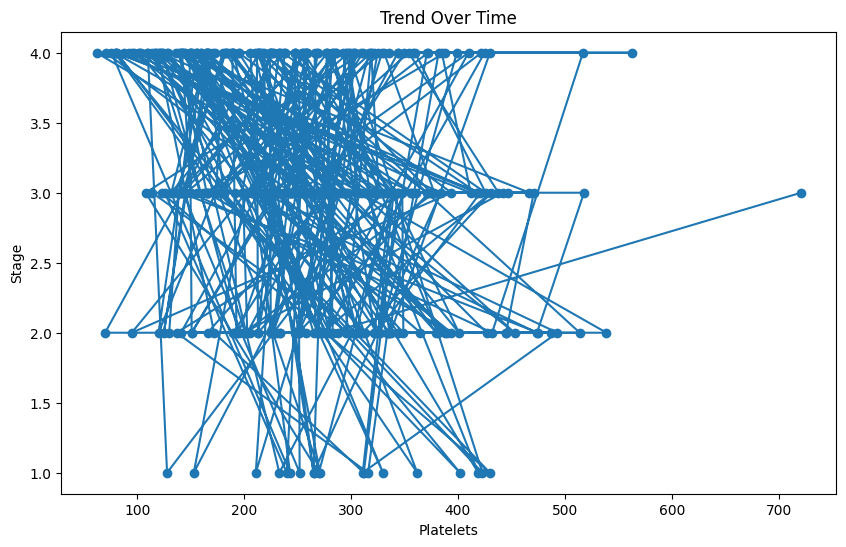

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Platelets'], df['Stage'], marker='o')
plt.title('Trend Over Time')
plt.xlabel('Platelets')
plt.ylabel('Stage')
plt.show()

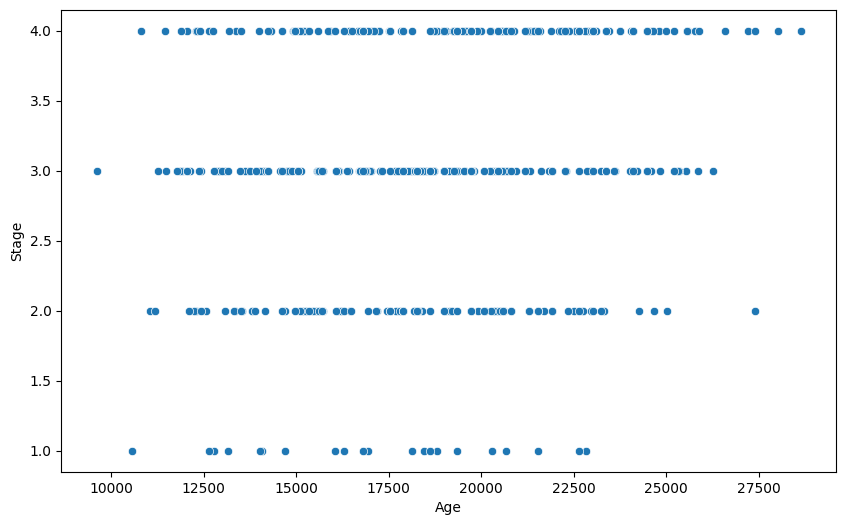

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Stage', data=df)
plt.xlabel('Age')
plt.ylabel('Stage')
plt.show()

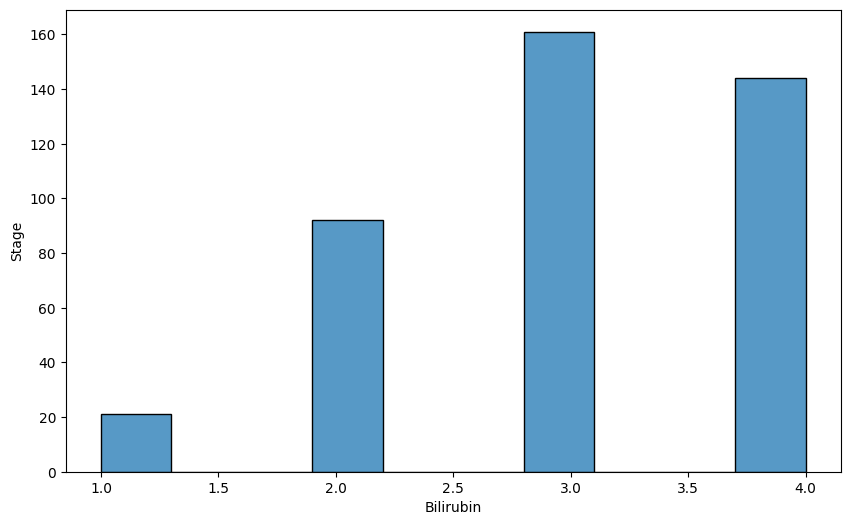

In [ ]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Stage'], bins=10)
plt.xlabel('Bilirubin')
plt.ylabel('Stage')
plt.show()

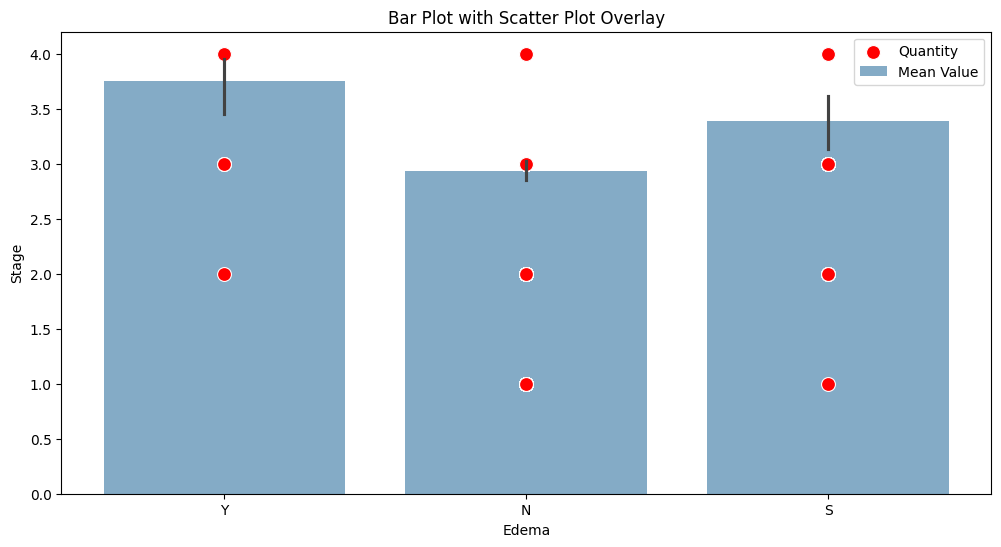

In [ ]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Edema', y='Stage', data=df, alpha=0.6, label='Mean Value')

# Overlay a scatter plot
sns.scatterplot(x='Edema', y='Stage', data=df, color='red', s=100, label='Quantity')

# Add titles and labels
plt.title('Bar Plot with Scatter Plot Overlay')
plt.xlabel('Edema')
plt.ylabel('Stage')
plt.legend()
plt.show()

# Choose a model
 * Preprocess data

* Fit and evaluate a default model

* Extract and visualize the top 10 features using permutation importance (from
Intro to ML Week 4)

* Add your observations in a Markdown: Do these features make sense based on the business case?

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg
# Model Pipeline
lin = make_pipeline(preprocessor, lin_reg)
lin

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('catogrical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NaN',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')),
                                                 ('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [ ]:
# Fit the model on the training data
lin.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('catogrical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NaN',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')),
                                                 ('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)



In [ ]:
# Obtain Model Evulation using custom function
evaluate_regression(lin, x_train, y_train, x_test, y_test)



------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 0.582
- MSE = 0.513
- RMSE = 0.716
- R^2 = 0.349

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 0.588
- MSE = 0.563
- RMSE = 0.751
- R^2 = 0.184


# Extract and visualize the top 10 features using permutation importance (from Intro to ML Week 4)


In [ ]:
from sklearn.inspection import permutation_importance
# Permutation importance takes a fit model and the test data.
r = permutation_importance(lin, x_test, y_test,n_repeats =5, random_state = 42)
r.keys()



dict_keys(['importances_mean', 'importances_std', 'importances'])

In [ ]:
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=x_test.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances



,permutation importance
Hepatomegaly,0.068033
Bilirubin,0.058567
N_Days,0.039336
Platelets,0.020074
Cholesterol,0.010896
Sex,0.010027
Age,0.009542
Albumin,0.004482
Prothrombin,0.002471
Alk_Phos,0.000251


In [ ]:
def plot_importance_color_ax(importances, top_n=None,  figsize=(8,6),
                          color_dict=None, ax=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors, ax=ax)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize, ax=ax)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax


<Axes: title={'center': 'Top 10 Most Important Features'}, xlabel='Importance', ylabel='Feature Names'>

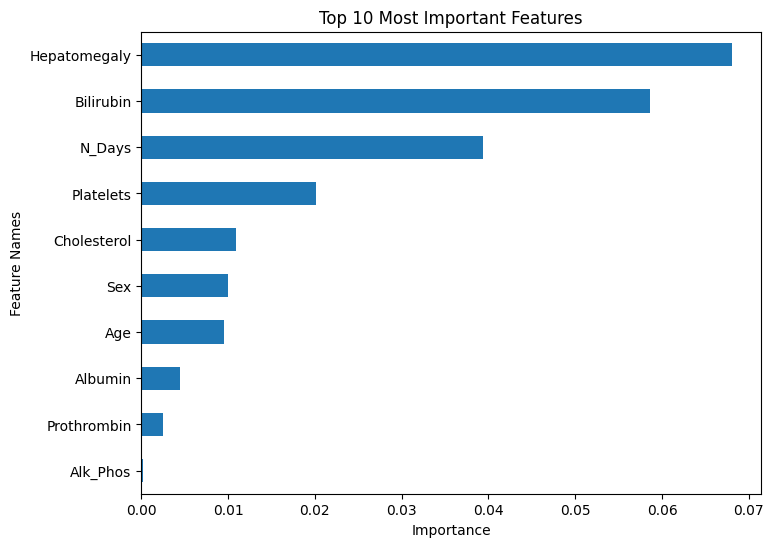

In [ ]:
plot_importance_color_ax(permutation_importances, top_n=10)

#Create Explanatory Visualizations for the most important features.

 * Select 2 out of the top 10 features from your permutation importances and produce explanatory visualizations showing the relationship between the feature and the target.

 * The purpose is to demonstrate key trends you found that will be of interest to a stakeholder.

* These visuals should be reporting-quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither of these should be histograms, boxplots, or correlation plots).
These will be added to your readme in part 4


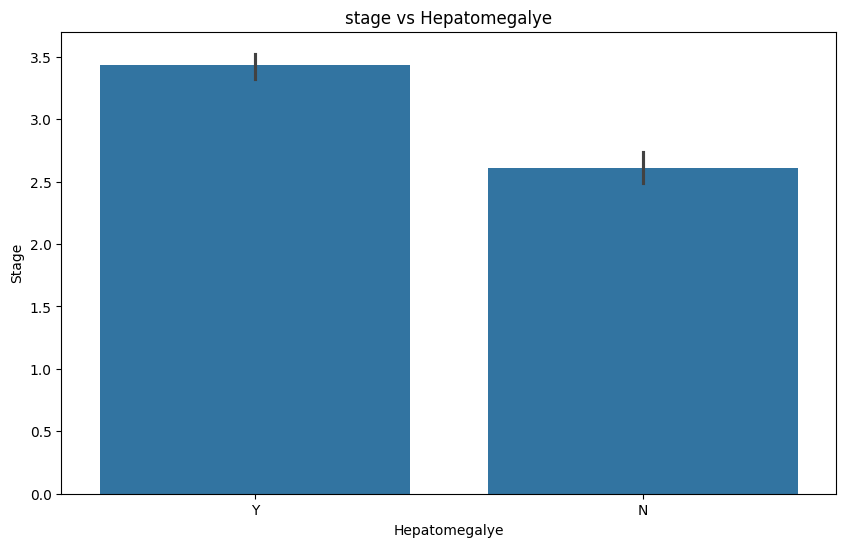

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Hepatomegaly', y='Stage', data=df)
plt.xlabel('Hepatomegalye')
plt.ylabel('Stage')
plt.title('stage vs Hepatomegalye')
plt.show()

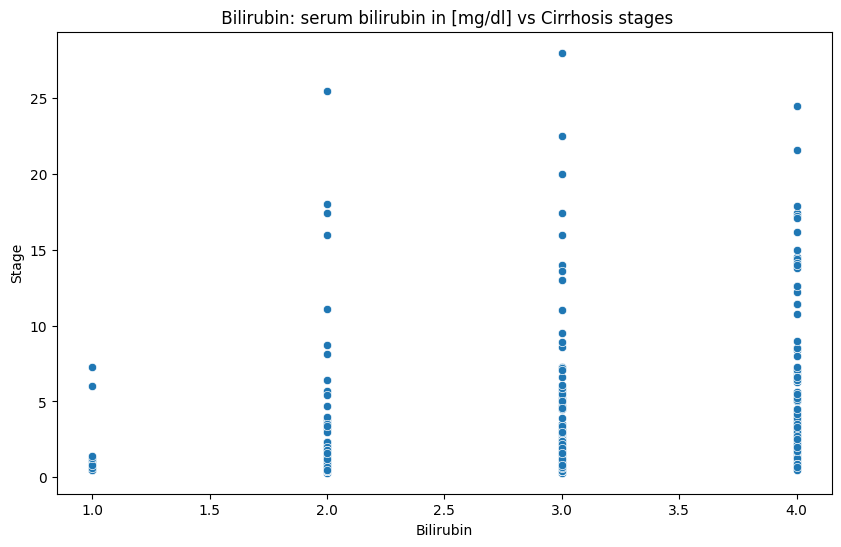

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Use sns.scatterplot instead of plt.scatterplot
sns.scatterplot(y='Bilirubin', x='Stage', data=df, marker='o')
plt.title(' Bilirubin: serum bilirubin in [mg/dl] vs Cirrhosis stages')
plt.xlabel('Bilirubin')
plt.ylabel('Stage')
plt.show()

# Project 4 - Part 2 (Core):

#​Task:Choose at least one feature engineering method to apply to the data and compare the models’  performance with and without engineering.

 * Apply PCA to get 3 principal components for the data. Concatenate/combine these PC’s with the original features (X_train, X_test data).

 * ​Remember to only fit the PCA on the training data and use pca.transform(X_test) to get the PCs for the testing data.


In [ ]:
# Instantiate PCA to make 3 principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
# Create and define the principal components
principal_components = pca.fit(x_train_processed)
# Transform the traning  data
principal_components_train = principal_components.transform(x_train_processed)
# Transform the testing data
principal_components_test = principal_components.transform(x_test_processed)
# Preview the results
principal_components_train.head()



,pca0,pca1,pca2
132,-1.243610,-0.272406,0.882100
60,-1.614274,0.332583,1.622504
198,0.216607,1.446046,-0.954632
332,-0.338312,-1.152790,-0.748816
63,0.815841,-0.479016,0.743182


In [ ]:
# Concatenate the principal components (transformed data) with the original training data
X_train_combined = pd.concat([pd.DataFrame(principal_components_train), x_train_processed], axis=1)
# Concatenate the principal components (transformed data) with the original testing data
X_test_combined = pd.concat([pd.DataFrame(principal_components_test), x_test_processed], axis=1)
# View the results
X_train_combined.head()

,pca0,pca1,pca2,Status_C,Status_CL,Status_D,Drug_D-penicillamine,Drug_NaN,Drug_Placebo,Sex_F,...,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
132,-1.243610,-0.272406,0.882100,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.094673,-0.358084,-0.126143,1.055965,-1.084819,-0.670351,0.286023,-0.402506,-0.967827,-0.627892
60,-1.614274,0.332583,1.622504,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.648012,-0.570223,-0.690815,1.032169,-0.868242,-0.655754,-1.187780,1.194278,-0.494040,2.368624
198,0.216607,1.446046,-0.954632,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-0.943761,-0.216657,0.173378,-0.181392,-0.521720,-0.172817,1.491861,1.301926,0.711025,-0.524564
332,-0.338312,-1.152790,-0.748816,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.476958,-0.051660,-0.234167,0.984579,-0.247391,-0.297505,-0.149419,-0.187210,-0.046003,-0.111251
63,0.815841,-0.479016,0.743182,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.119106,-0.216657,0.080085,-0.014825,-0.521720,-0.407595,0.754960,1.194278,-0.833931,0.302062


# Fit and evaluate a model using your new features and compare it to your model from Part 1.


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg
# Model Pipeline
lin = make_pipeline(lin_reg)
lin

Pipeline(steps=[('linearregression', LinearRegression())])

In [ ]:
# Fit the model on the training data
lin.fit(X_train_combined,y_train)


Pipeline(steps=[('linearregression', LinearRegression())])

In [ ]:
# Obtain Model Evulation using custom function
evaluate_regression(lin, X_train_combined,y_train,X_test_combined, y_test)



------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 0.582
- MSE = 0.513
- RMSE = 0.716
- R^2 = 0.350

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 0.590
- MSE = 0.565
- RMSE = 0.752
- R^2 = 0.182


# Apply at least one method of feature selection (filtering, embedded, wrapper) to your new features including engineered data.

 * Fit and evaluate a final model using the selected features. Compare it with previous models

# filtering(Correlation)

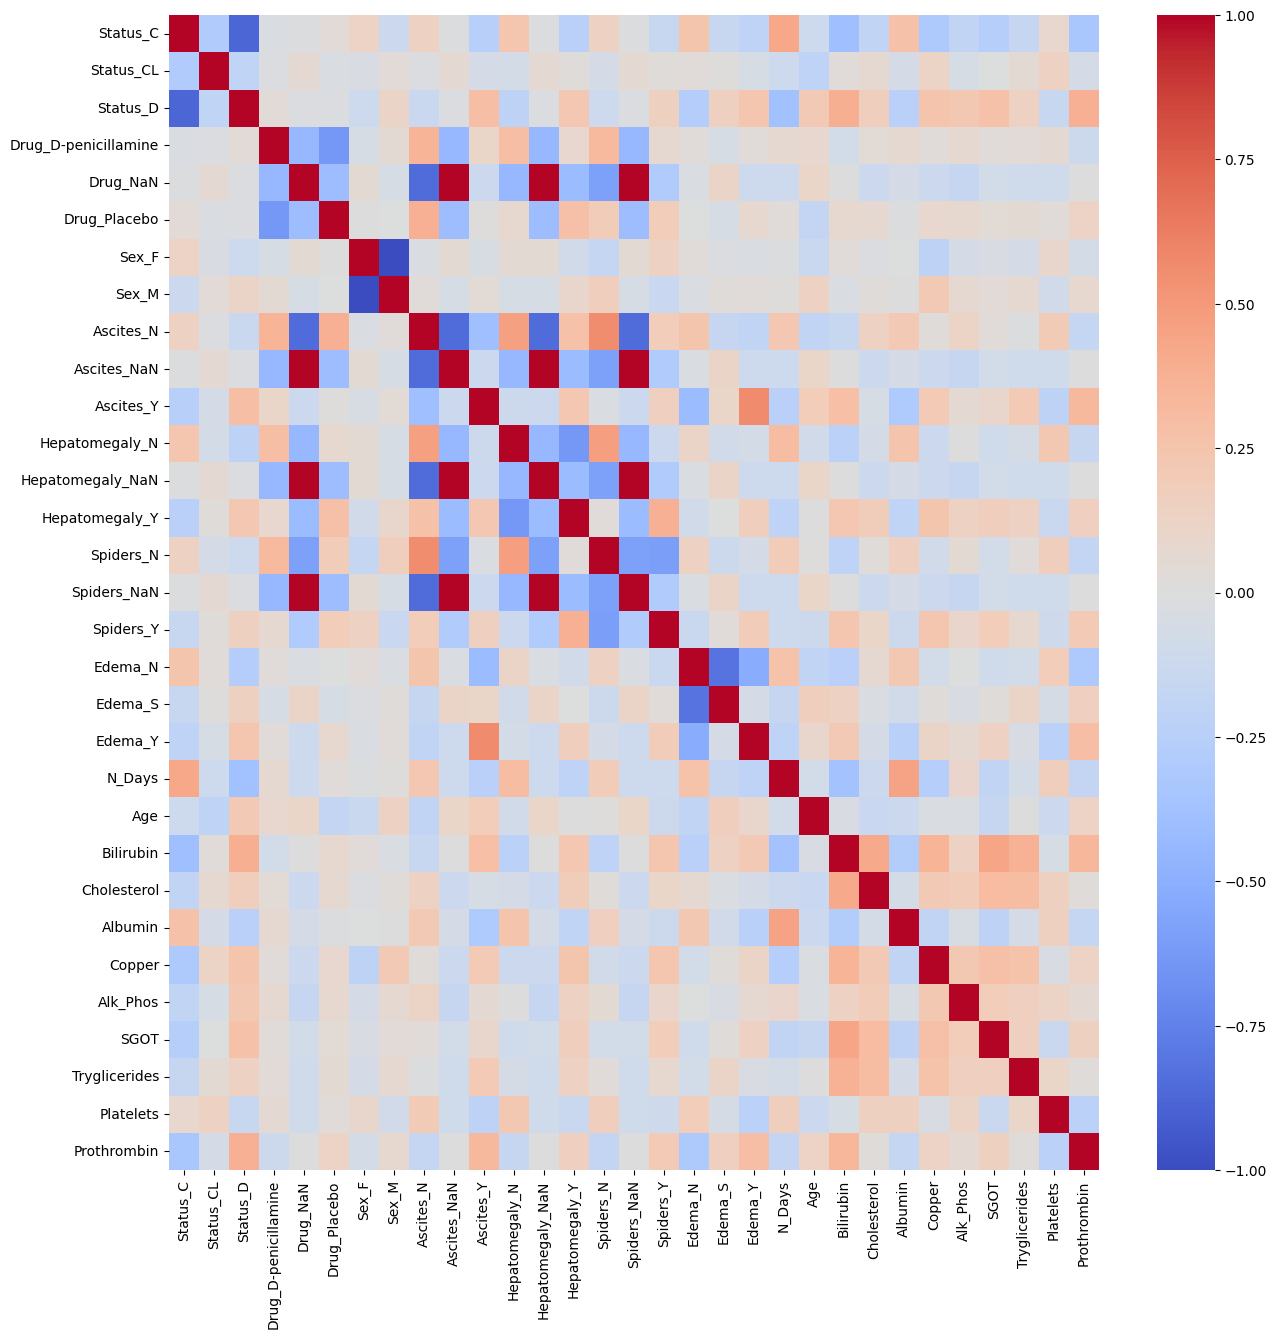

In [ ]:
# Make a correlation heatmap of all features
corr = x_train_processed.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap='coolwarm');



In [ ]:
!pip install collinearity
from collinearity import SelectNonCollinear
from sklearn.feature_selection import f_classif



In [ ]:
# Instantiate the selector, indicate theshold for r, also include the appropriate scoring metric for the task
selector = SelectNonCollinear(correlation_threshold = 0.6, scoring = f_classif)

# Fit on the training data, use .values
selector.fit(x_train_processed.values, y_train.values)



In [ ]:
# Define a mask for filtering
non_collinear = selector.get_support()
non_collinear[:5]


[True, True, False, False, False]

In [ ]:
# Check how many features are below the theshold
non_collinear.count(True)



22

In [ ]:
# Check how many features are above the theshold
non_collinear.count(False)



9

In [ ]:
# Filter training data
training_data_to_keep = x_train_processed.values[:, non_collinear]
# Filter column names
columns = np.array(x_train_processed.columns)[non_collinear]
# Make traing data into a dataframe
X_train_no_corr = pd.DataFrame(training_data_to_keep, columns = columns)

# Filter testing data
test_data_to_keep = x_test_processed.values[:, non_collinear]
# Make test data into a dataframe
X_test_no_corr = pd.DataFrame(test_data_to_keep, columns = columns)



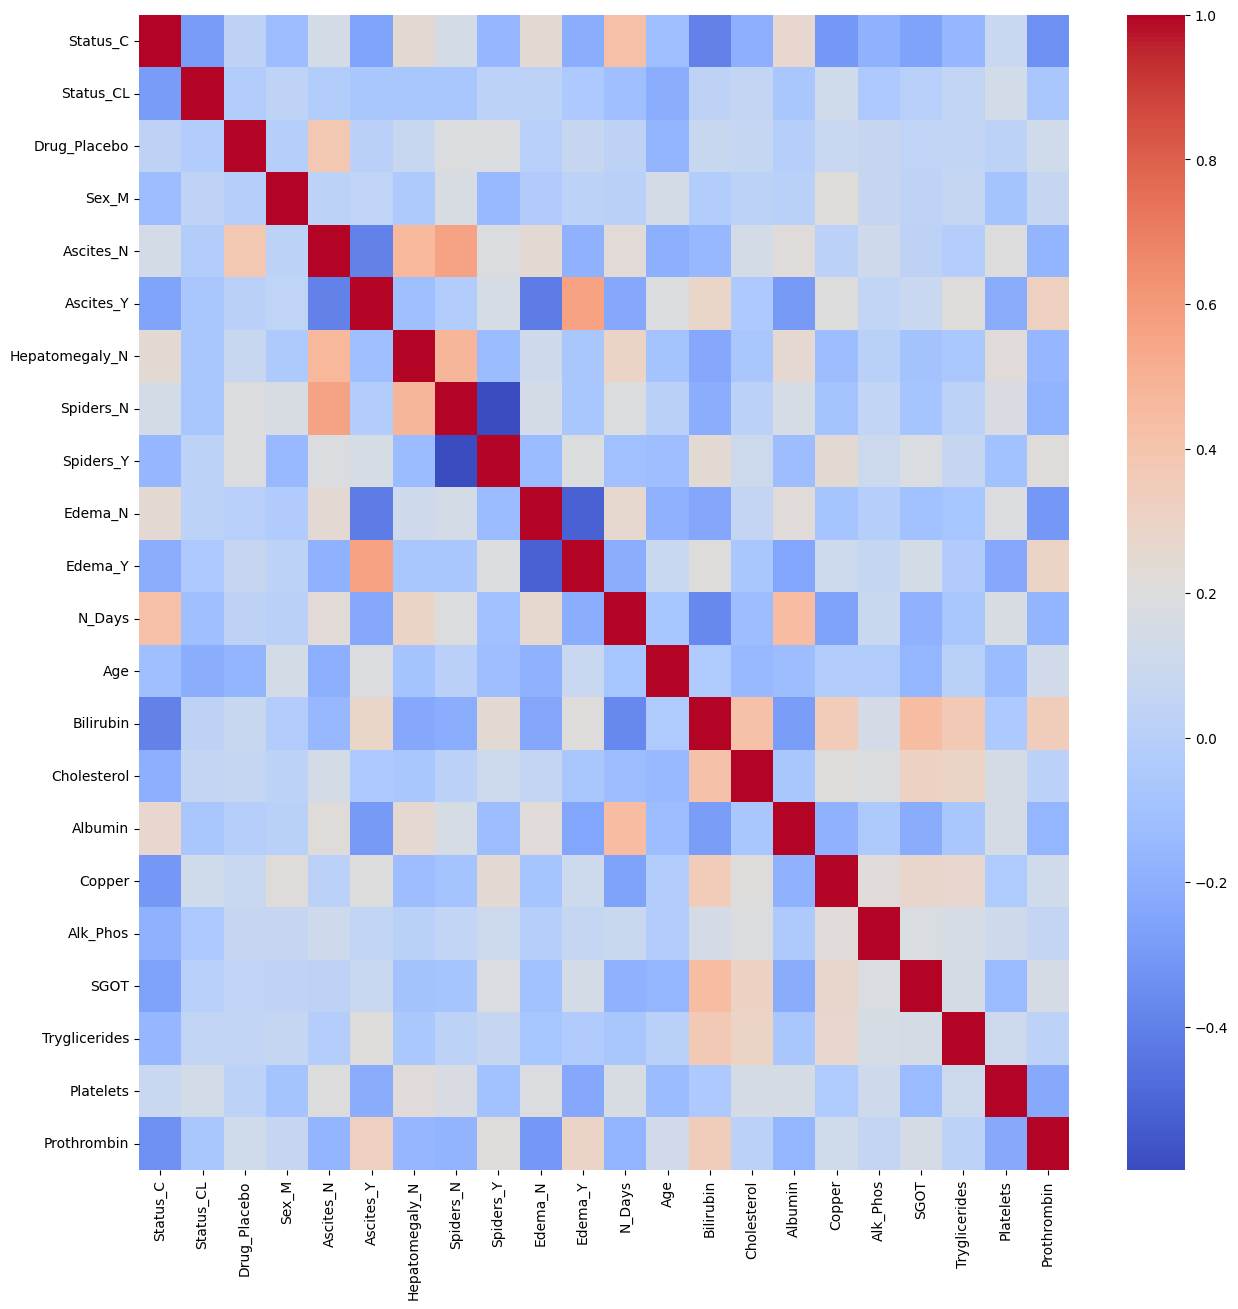

In [ ]:
# Make correlation heatmap for non_collinear features
corr = X_train_no_corr.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap='coolwarm');



In [ ]:
lin.fit(X_train_no_corr,y_train)

Pipeline(steps=[('linearregression', LinearRegression())])

In [ ]:
# Obtain Model Evulation using custom function
evaluate_regression(lin,X_train_no_corr,y_train ,X_test_no_corr, y_test)



------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 0.582
- MSE = 0.513
- RMSE = 0.716
- R^2 = 0.349

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 0.588
- MSE = 0.563
- RMSE = 0.751
- R^2 = 0.184


# Extract and visualize the top 10 features using permutation importance (from Intro to ML Week 4).


In [ ]:
from sklearn.inspection import permutation_importance
# Permutation importance takes a fit model and the test data.
r = permutation_importance(lin, X_test_no_corr, y_test,n_repeats =5, random_state = 42)
r.keys()



dict_keys(['importances_mean', 'importances_std', 'importances'])

In [ ]:
## can make the mean importances into a series
permutation_importances_ = pd.Series(r['importances_mean'],index=X_test_no_corr.columns,
                           name = 'permutation importance')
permutation_importances_ = permutation_importances.sort_values(ascending=False)
permutation_importances_



,permutation importance
Hepatomegaly,0.068033
Bilirubin,0.058567
N_Days,0.039336
Platelets,0.020074
Cholesterol,0.010896
Sex,0.010027
Age,0.009542
Albumin,0.004482
Prothrombin,0.002471
Alk_Phos,0.000251


<Axes: title={'center': 'Top 10 Most Important Features'}, xlabel='Importance', ylabel='Feature Names'>

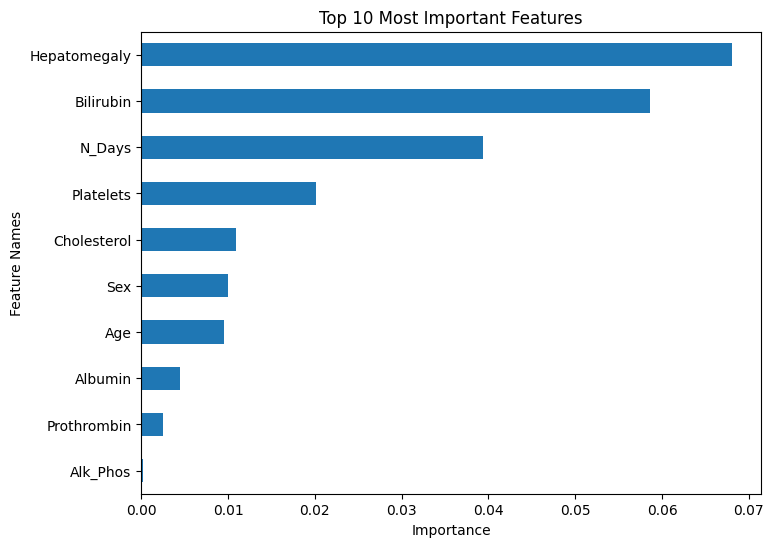

In [ ]:
plot_importance_color_ax(permutation_importances_, top_n=10)

# Project 4 - Part 3

# ​Build a small neural network (with only 1 hidden layer)

Ensure the final layer is appropriate for your task (number of units and activation function).

Fit it for 50 epochs

 Use the Early Stopping callback


Start with patience =5 monitoring val_accuracy.

Use a validation_split of .2

Save the history and visualize it.

In [ ]:
x_train_processed, x_val, y_train, y_val = train_test_split(x_train_processed, y_train, test_size=0.2, random_state=42)

In [ ]:
# the target is multi class so i will use Multiclass Classification ANN

In [ ]:
#Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
#Sci-kit Learn
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Custom function for plotting each metric
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes


In [ ]:
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):

    # Get the classification report
    report = classification_report(y_true, y_pred)
    ## Print header and report
    header = "-"*70
    print(header, f" Classification Metrics: {label}", header, sep='\n')
    print(report)

    ## CONFUSION MATRICES SUBPLOTS
    fig, axes = plt.subplots(ncols=2, figsize=figsize)

    # create a confusion matrix  of raw counts
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', values_format="d", colorbar=colorbar,
                ax = axes[0],);
    axes[0].set_title("Raw Counts")

    # create a confusion matrix with the test data
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, values_format=".2f", colorbar=colorbar,
                ax = axes[1]);
    axes[1].set_title("Normalized Confusion Matrix")

    # Adjust layout and show figure
    fig.tight_layout()
    plt.show()

    # Return dictionary of classification_report
    if output_dict==True:
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        return report_dict



the data is imbalanced


In [ ]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
# encode labels


In [ ]:
 from sklearn.preprocessing import LabelEncoder, LabelBinarizer
# encode labels
encoder = LabelEncoder()

encoder.fit(y_train)
y_train_enc = encoder.transform(y_train)
y_test_enc = encoder.transform(y_test)
y_val_enc = encoder.transform(y_val)
# binarize labels
binarizer = LabelBinarizer()

binarizer.fit(y_train)
y_train_bin = binarizer.transform(y_train)
y_test_bin = binarizer.transform(y_test)
y_val_bin = binarizer.transform(y_val)

# check results
print('Original Target')
print(y_train.head())

print('\nEncoded Target')
print(y_train_enc[:5])

print('\nBinarized Target')
print(y_train_bin[:5])

Original Target
375    3.0
8      2.0
52     4.0
291    3.0
267    4.0
Name: Stage, dtype: float64

Encoded Target
[2 1 3 2 3]

Binarized Target
[[0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 0 1]]


In [ ]:
# Define input shape
input_shape = x_train_processed.shape[1]
input_shape



31

In [ ]:
# Define number of classes
num_classes = len(y_train.unique())
num_classes



4

In [ ]:
# Build multiclass classification model within function
def build_model():
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(31, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
    model.add(Dense(15,
                activation = 'relu'))

    #Output layer
    model.add(Dense(num_classes, activation = 'softmax'))


    # Compile Model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
             metrics=['accuracy', metrics.Precision(), metrics.Recall()])
    return model



In [ ]:
# Call our build function to build model
multi_model = build_model()

# Get model summary
multi_model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 31)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 15)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 4)                   │              64 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,536 (6.00 KB)

 Trainable params: 1,536 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# fit model

history = multi_model.fit(x_train_processed, y_train_bin,
                          validation_data=(x_val, y_val_bin),
                          epochs=15,
                          verbose=1)



Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.1733 - loss: 1.6206 - precision_6: 0.0708 - recall_6: 0.0066 - val_accuracy: 0.3175 - val_loss: 1.4043 - val_precision_6: 0.6667 - val_recall_6: 0.0317
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3219 - loss: 1.4071 - precision_6: 0.2902 - recall_6: 0.0164 - val_accuracy: 0.4286 - val_loss: 1.2873 - val_precision_6: 1.0000 - val_recall_6: 0.0159
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4043 - loss: 1.3281 - precision_6: 0.6802 - recall_6: 0.0312 - val_accuracy: 0.5238 - val_loss: 1.2157 - val_precision_6: 1.0000 - val_recall_6: 0.0317
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4636 - loss: 1.2525 - precision_6: 0.7466 - recall_6: 0.0481 - val_accuracy: 0.4921 - val_loss: 1.1658 - val_precision_6: 0.8000 - val_recall_6: 0.0635
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4890 - loss: 1.2013 - precision_6: 0.7008 - recall_6: 0.0784 - val_accuracy:

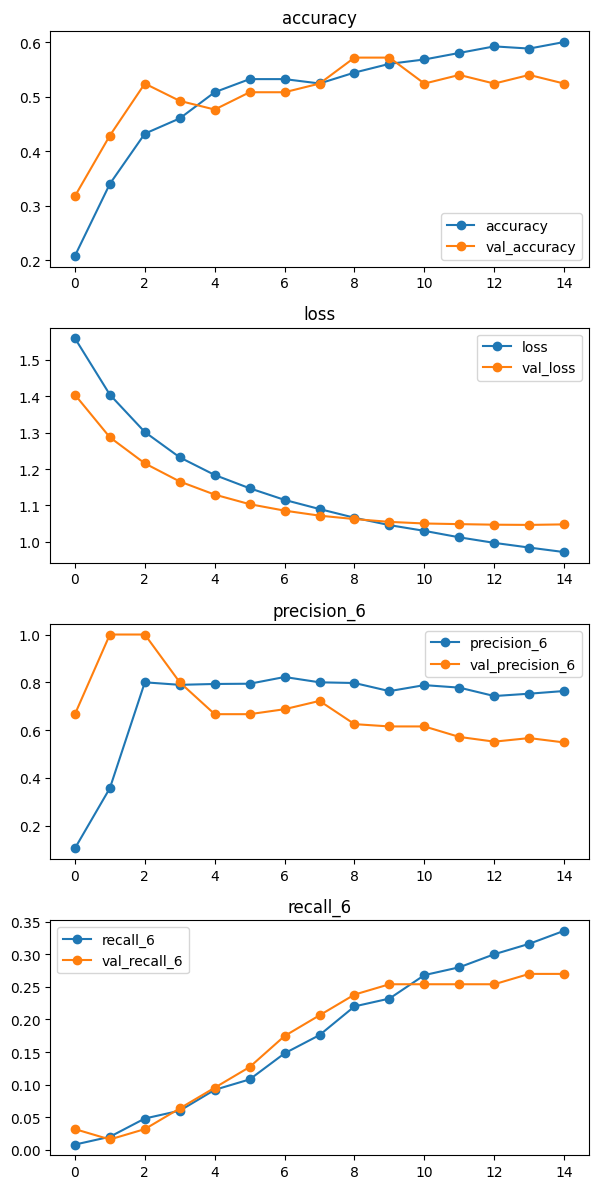

In [ ]:
# plot learning history

plot_history(history);



the model is overfit and need more epochs for learning; so i will decrease the number of nuron and use dropout

# Evaluate the model using sklearn evaluation metrics:

Confusion Matrix
Classification Report

You are welcome to use the custom evaluation functions

In [ ]:
# get raw predictions
raw_pred = multi_model.predict(x_test_processed)

# display predictions and binarized true labels
print('Raw Predictions\n', raw_pred[:5])
print('\nbinarized y_test\n', y_test_bin[:5])



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Raw Predictions
 [[0.03158499 0.20161255 0.28552285 0.48127952]
 [0.16811591 0.2727625  0.1274875  0.43163413]
 [0.03940558 0.22544453 0.2229305  0.51221937]
 [0.0277641  0.02717017 0.17002098 0.77504474]
 [0.00525537 0.00625924 0.04773844 0.9407468 ]]

binarized y_test
 [[0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 0]]


In [ ]:
# convert predictions and labels into integers representing each fish class.
y_pred = np.argmax(raw_pred, axis=1)
y_true = np.argmax(y_test_bin, axis=1)


print('integer predictions', y_pred)
print('integer true labels', y_true)


integer predictions [3 3 3 3 3 2 1 3 3 2 3 3 1 2 3 2 2 3 2 2 2 2 2 2 2 1 1 3 3 1 2 3 2 3 3 2 3
 2 2 3 1 1 2 2 3 2 3 2 3 2 3 3 2 3 1 2 3 2 2 1 2 3 2 2 3 1 1 3 3 2 3 2 1 3
 2 2 3 3 2 2 1 1 3 2 3 3 3 2 2 2 3 3 3 3 2 1 2 2 1 3 3 2 3 3 2]
integer true labels [2 1 3 2 2 1 0 3 2 2 3 2 2 3 2 3 2 3 1 2 3 3 2 3 2 2 2 3 1 2 2 3 1 3 3 2 3
 1 3 3 3 1 2 3 3 2 2 2 3 2 3 3 1 3 2 1 2 2 2 3 2 1 2 3 3 0 1 1 3 2 2 1 2 3
 2 2 3 3 1 0 1 1 3 2 2 3 3 1 1 2 1 2 1 2 2 1 2 2 0 3 2 3 2 3 2]


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.31      0.24      0.27        21
           2       0.55      0.55      0.55        44
           3       0.56      0.69      0.62        36

    accuracy                           0.51       105
   macro avg       0.35      0.37      0.36       105
weighted avg       0.48      0.51      0.49       105



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


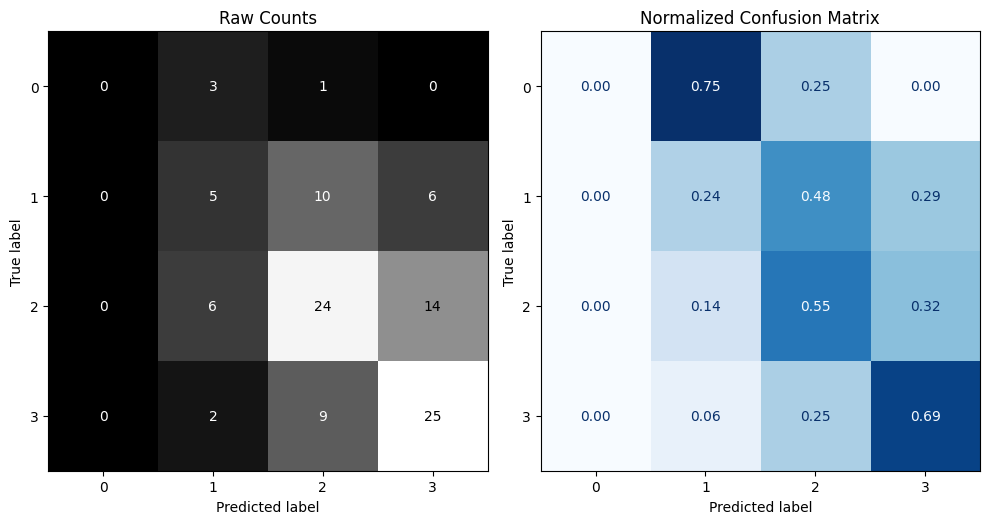

In [ ]:
# Getting Sklearn Metrics
classification_metrics(y_true, y_pred, label='Test Data', figsize=(10,8))



# model 2

# Tune at least 3 parameters with the Keras tuner:

Include a dropout layer and adjust the dropout rate.

Number of Units

Optimizer

Learning rates

In [ ]:
!pip install keras-tuner

In [ ]:
from keras_tuner import HyperParameters as hp
import keras_tuner as kt
import keras # Import keras module


In [ ]:
# Make a folder to store results of hyperparameter tuning
import os
folder = 'KerasTuner/'
os.makedirs(folder, exist_ok=True)



In [ ]:
# Build multiclass classification model within function
def build_model2(hp):
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(30, # How many neurons you have in your first hidden layer
    input_dim =input_shape, # What is the shape of your input features (number of columns)
    activation = 'relu')) # What activation function are you using?
    model.add(Dense(units=hp.Int('units', min_value=5, max_value=13, step=1), activation = 'relu'))
    model.add(Dropout(hp.Float(name="dropout_value", min_value=0.0, max_value=0.5, step=0.1)))
    #Output layer
    model.add(Dense(num_classes, activation = 'softmax'))
    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    # Choose the optimizer
    hp_optimizer = hp.Choice('optimizer', ['RMSprop', 'Adam'])
    # Compile Model
    model.compile(loss = 'categorical_crossentropy', optimizer=getattr(keras.optimizers, hp_optimizer)(learning_rate=hp_learning_rate),
             metrics=['accuracy', metrics.Precision(), metrics.Recall()])
    return model



In [ ]:
# Define tuner object
tuner = kt.Hyperband(build_model2,
                     objective='val_accuracy',
                     max_epochs=100,
                     directory=folder,
                     overwrite = True,
                     seed = 42,
                     project_name='Rookie_tuning')



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# Run the tuner
epochs = 6
tuner.search(x_train_processed, y_train_bin,  epochs=epochs,
             validation_data = (x_val, y_val_bin))


In [ ]:
# Obtain best hyperparameter values
best_hps=tuner.get_best_hyperparameters()[0]
best_hps.values



IndexError: list index out of range

In [ ]:
# Obtain best model
best_model = tuner.get_best_models()[0]
best_model.summary()



In [ ]:
# get raw predictions
raw_pred = best_model.predict(x_test_processed)

# display predictions and binarized true labels
print('Raw Predictions\n', raw_pred[:5])
print('\nbinarized y_test\n', y_test_bin[:5])



In [ ]:
# convert predictions and labels into integers representing each fish class.
y_pred = np.argmax(raw_pred, axis=1)
y_true = np.argmax(y_test_bin, axis=1)

print('integer predictions', y_pred)
print('integer true labels', y_true)


In [ ]:
# Getting Sklearn Metrics
classification_metrics(y_true, y_pred, label='Test Data', figsize=(10,8))



# model 3

In [ ]:
# Build multiclass classification model within function
def build_model3():
    # Instantiate Model
    model3 = Sequential()

    # First hidden layer
    model3.add(Dense(31, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
    model3.add(Dense(15,
                activation = 'relu'))
    model3.add(Dropout(.3))
    #Output layer
    model3.add(Dense(num_classes, activation = 'softmax'))


    # Compile Model
    model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
             metrics=['accuracy', metrics.Precision(), metrics.Recall()])
    return model3



In [ ]:
multi_model3

In [ ]:
# Call our build function to build model
multi_model3 = build_model()

# Get model summary
multi_model3.summary()



Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 31)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 15)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 4)                   │              64 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,536 (6.00 KB)

 Trainable params: 1,536 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# fit model

history = multi_model3.fit(x_train_processed, y_train_bin,
                          validation_data=(x_val, y_val_bin),
                          epochs=15,
                          verbose=1)



Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.3467 - loss: 1.3168 - precision_8: 0.5544 - recall_8: 0.0496 - val_accuracy: 0.3651 - val_loss: 1.2629 - val_precision_8: 0.2500 - val_recall_8: 0.0159
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4107 - loss: 1.2697 - precision_8: 0.4804 - recall_8: 0.0467 - val_accuracy: 0.3810 - val_loss: 1.2245 - val_precision_8: 0.2500 - val_recall_8: 0.0159
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5073 - loss: 1.1883 - precision_8: 0.6093 - recall_8: 0.0748 - val_accuracy: 0.3810 - val_loss: 1.1935 - val_precision_8: 0.6000 - val_recall_8: 0.0476
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4969 - loss: 1.1592 - precision_8: 0.6738 - recall_8: 0.0979 - val_accuracy: 0.3968 - val_loss: 1.1698 - val_precision_8: 0.7143 - val_recall_8: 0.0794
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4405 - loss: 1.1576 - precision_8: 0.6193 - recall_8: 0.0980 - val_accuracy:

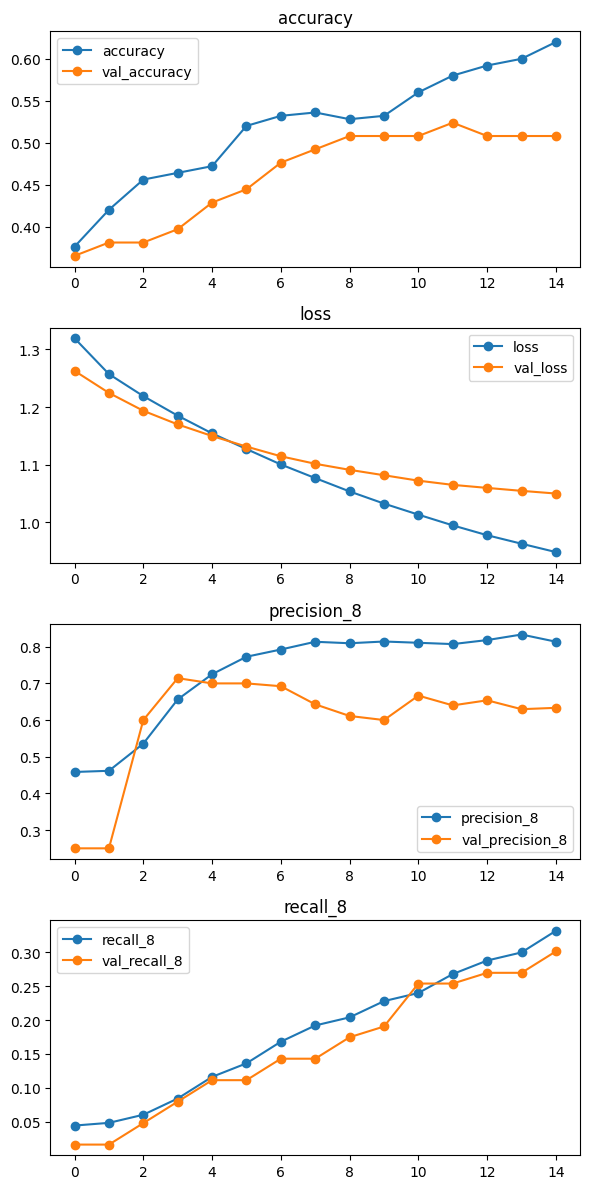

In [ ]:
# plot learning history

plot_history(history);



In [ ]:
# get raw predictions
raw_pred = multi_model3.predict(x_test_processed)

# display predictions and binarized true labels
print('Raw Predictions\n', raw_pred[:5])
print('\nbinarized y_test\n', y_test_bin[:5])



4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
Raw Predictions
 [[4.2332686e-02 1.9396265e-01 3.0535552e-01 4.5834914e-01]
 [7.3480040e-02 9.3530156e-02 2.5763708e-01 5.7535273e-01]
 [3.2737818e-02 2.2005831e-01 3.3434054e-01 4.1286334e-01]
 [9.9480962e-03 3.0876853e-02 3.4518921e-01 6.1398578e-01]
 [9.8754914e-05 6.6358349e-03 5.6069745e-03 9.8765844e-01]]

binarized y_test
 [[0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 0]]


In [ ]:
# convert predictions and labels into integers representing each fish class.
y_pred = np.argmax(raw_pred, axis=1)
y_true = np.argmax(y_test_bin, axis=1)

print('integer predictions', y_pred)
print('integer true labels', y_true)


integer predictions [3 3 3 3 3 2 2 3 2 3 3 3 2 3 3 2 2 3 2 3 3 2 2 3 2 2 2 3 3 2 2 3 2 3 3 2 3
 1 2 3 2 2 2 2 3 2 3 2 3 2 3 3 2 3 2 2 3 3 2 2 2 3 2 2 3 1 2 3 3 2 3 1 1 3
 2 2 2 2 2 1 1 2 3 2 2 2 3 2 1 2 3 3 3 3 2 2 2 2 1 3 2 2 2 3 2]
integer true labels [2 1 3 2 2 1 0 3 2 2 3 2 2 3 2 3 2 3 1 2 3 3 2 3 2 2 2 3 1 2 2 3 1 3 3 2 3
 1 3 3 3 1 2 3 3 2 2 2 3 2 3 3 1 3 2 1 2 2 2 3 2 1 2 3 3 0 1 1 3 2 2 1 2 3
 2 2 3 3 1 0 1 1 3 2 2 3 3 1 1 2 1 2 1 2 2 1 2 2 0 3 2 3 2 3 2]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.50      0.19      0.28        21
           2       0.57      0.68      0.62        44
           3       0.57      0.69      0.62        36

    accuracy                           0.56       105
   macro avg       0.41      0.39      0.38       105
weighted avg       0.53      0.56      0.53       105



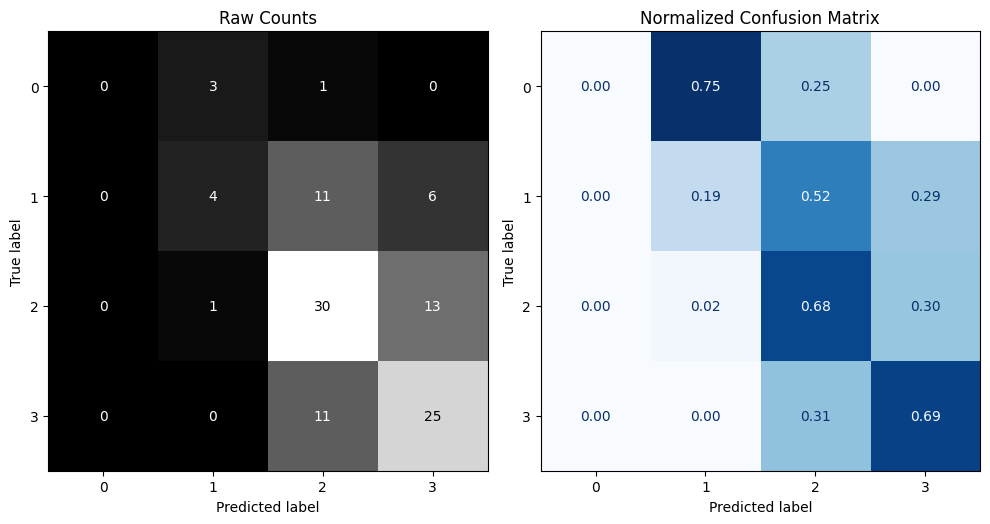

In [ ]:
# Getting Sklearn Metrics
classification_metrics(y_true, y_pred, label='Test Data', figsize=(10,8))

